In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:
def selectBest(data, jump):
    indexes = data.index
    for i in range(indexes[0], indexes[-1], jump):
        print(i)
        indice_inicial = i
        indice_final = i + jump - 1

        subconjunto = data.loc[indice_inicial:indice_final]
        indice_maximo = subconjunto['weighted_avg'].nlargest(1).index

        print(data.loc[indice_maximo, "Another_Info"])

In [99]:
df = pd.read_csv("final_results.csv")
df.loc[((df['Method'] == "Reweighing") & (df['Another_Info'] == "No Reweighing")), 'Method'] = "BaseRL"
# Imprimindo o dataset ordenado
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Adult")], 11) #=> 1
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "German")], 11) #=> 0.2
#selectBest(df[(df['Method'] == "DisparactImpactRemover") & (df['Data_Name'] == "Compas")], 11) #=> 0.8
df

,F1-Score,Statistical Parity,Another_Info,Method,Data_Name,weighted_avg
0,0.586821,0.127198,0.0,DisparactImpactRemover,Adult,0.650160
1,0.586708,0.112494,0.1,DisparactImpactRemover,Adult,0.670217
2,0.586573,0.106573,0.2,DisparactImpactRemover,Adult,0.678235
3,0.581455,0.085569,0.3,DisparactImpactRemover,Adult,0.703639
4,0.578514,0.072411,0.4,DisparactImpactRemover,Adult,0.719727
...,...,...,...,...,...,...
343,0.617341,0.084904,With Reweighing,Reweighing,Compas,0.728039
344,0.610304,0.231155,No Reweighing,BaseRL,Compas,0.523210
345,0.619112,0.091275,With Reweighing,Reweighing,Compas,0.720476
346,0.649891,0.189088,No Reweighing,BaseRL,Compas,0.606714


In [100]:
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Adult")], 3) #=> 25
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "German")], 3) #=> 0.1
#selectBest(df[(df['Method'] == "PrejudiceRemover") & (df['Data_Name'] == "Compas")], 3) #=> 25

In [101]:
df = df.drop((df.loc[(df['Another_Info'] != "1.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.2") & (df["Data_Name"] =="German") & (df["Method"] =="DisparactImpactRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.8") & (df["Data_Name"] =="Compas") & (df["Method"] =="DisparactImpactRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "best eta = 10 ") & (df["Data_Name"] =="Adult") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="German") & (df["Method"] == "Optimizer")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "best eta = 0.01 ") & (df["Data_Name"] =="Compas") & (df["Method"] == "Optimizer")]).index)

df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Adult") & (df["Method"] == "PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "0.1") & (df["Data_Name"] =="German") & (df["Method"] =="PrejudiceRemover")]).index)
df = df.drop((df.loc[(df['Another_Info'] != "25.0") & (df["Data_Name"] =="Compas") & (df["Method"] =="PrejudiceRemover")]).index)

df = df.drop((df.loc[(df['Another_Info'] == "Test No Change") & (df["Method"] == "RejectClass")]).index)

df['Another_Info'].value_counts() # OK

Test with Change    15
No Reweighing       15
With Reweighing     15
best eta = 0.01     10
25.0                10
1.0                  5
0.2                  5
0.8                  5
best eta = 10        5
0.1                  5
Name: Another_Info, dtype: int64

In [102]:
ordem_desejada = ["BaseRL", "Reweighing", "DisparactImpactRemover", "Optimizer", "PrejudiceRemover" , "RejectClass"]

# Ordenando o dataset de acordo com a coluna e a ordem desejada
df = df.sort_values(by="Method", key=lambda x: x.map(ordem_desejada.index))
df["Statistical Parity"] = df["Statistical Parity"].apply(abs)
df['Method'].unique()

array(['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer',
       'PrejudiceRemover', 'RejectClass'], dtype=object)

In [103]:
from matplotlib.ticker import FormatStrFormatter
def plot_combined(data_name):
    # Dados de exemplo
    categorias = ['BaseRL', 'Reweighing', 'DisparactImpactRemover', 'Optimizer', 'PrejudiceRemover', 'RejectClass']
    names_method = ["BLR", "RW",
                    "DIR", "CO",
                    "PR", "ROC"]  

    df_method = df[df['Data_Name'] == data_name]

    metrica1 = []
    dp1 = []
    metrica2 = []
    dp2 = []

    for name in categorias:
        metrica1.append(df_method.loc[df['Method'] == name]['F1-Score'].mean())  
        dp1.append(df_method.loc[df['Method'] == name]['F1-Score'].std()) 
        metrica2.append(df_method.loc[df['Method'] == name]['Statistical Parity'].mean())  
        dp2.append(df_method.loc[df['Method'] == name]['Statistical Parity'].std()) 

    # Definir a largura das barras
    largura_barra = 0.55

    # Definir a posição das barras no eixo x
    posicao_metrica1 = np.arange(len(categorias))
    posicao_metrica2 = posicao_metrica1 + largura_barra

    sns.set(style="darkgrid")
    sns.despine()

    # Criar o subplot com os dois gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

    cores = sns.color_palette("Blues_d", len(categorias))  # Lista de cores

    # Iterar sobre cada barra e atribuir uma cor no primeiro gráfico
    for i in range(len(categorias)):
        barra = ax1.bar(posicao_metrica1[i], metrica1[i], largura_barra, label=names_method[i], yerr=dp1[i], capsize=15, color=cores[i])

    ytick_labels = ax1.get_yticks().tolist()
    ax1.set_yticklabels(ytick_labels, fontsize=28)

    # Definir o formatador de rótulos personalizado para exibir duas casas decimais
    formatador = FormatStrFormatter('%.2f')
    ax1.yaxis.set_major_formatter(formatador)
    # Configurar os rótulos do eixo x e o título do primeiro gráfico
    ax1.set_xticks(posicao_metrica1)
    ax1.set_xticklabels(names_method, horizontalalignment='center', fontsize=30)
    ax1.set_xlabel('Methods', fontsize=40, labelpad = 32)
    ax1.set_ylabel('F1 Score', fontsize=46, labelpad = 40)
    title1 = "Utility Metric"
    ax1.set_title(title1, fontsize=44, fontweight='bold', pad = 35)
    ax1.set_ylim(0, 1)

    # Iterar sobre cada barra e atribuir uma cor no segundo gráfico
    for i in range(len(categorias)):
        barra = ax2.bar(posicao_metrica1[i], metrica2[i], largura_barra, label=names_method[i], yerr=dp2[i], capsize=15, color=cores[i])

    ytick_labels = ax2.get_yticks().tolist()
    ax2.set_yticklabels(ytick_labels, fontsize=28)

    # Definir o formatador de rótulos personalizado para exibir duas casas decimais
    formatador = FormatStrFormatter('%.2f')
    ax2.yaxis.set_major_formatter(formatador)

    # Configurar os rótulos do eixo x e o título do segundo gráfico
    ax2.set_xticks(posicao_metrica1)
    ax2.set_xticklabels(names_method, horizontalalignment='center', fontsize=30)
    ax2.set_xlabel('Methods', fontsize=40, labelpad = 32)
    ax2.set_ylabel('Statistical Parity Difference', fontsize=46, labelpad = 35)
    title2 = "Fairness Metric"
    ax2.set_title(title2, fontsize=44, fontweight='bold', pad = 35)
    ax2.set_ylim(0, 0.4)

    plt.tight_layout()
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=None) 
    # Mostrar o gráfico
    plt.show()

    fig.savefig(".//plots//" + data_name + ".pdf", dpi = 800)

C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels, fontsize=28)
C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ytick_labels, fontsize=28)


<Figure size 640x480 with 0 Axes>

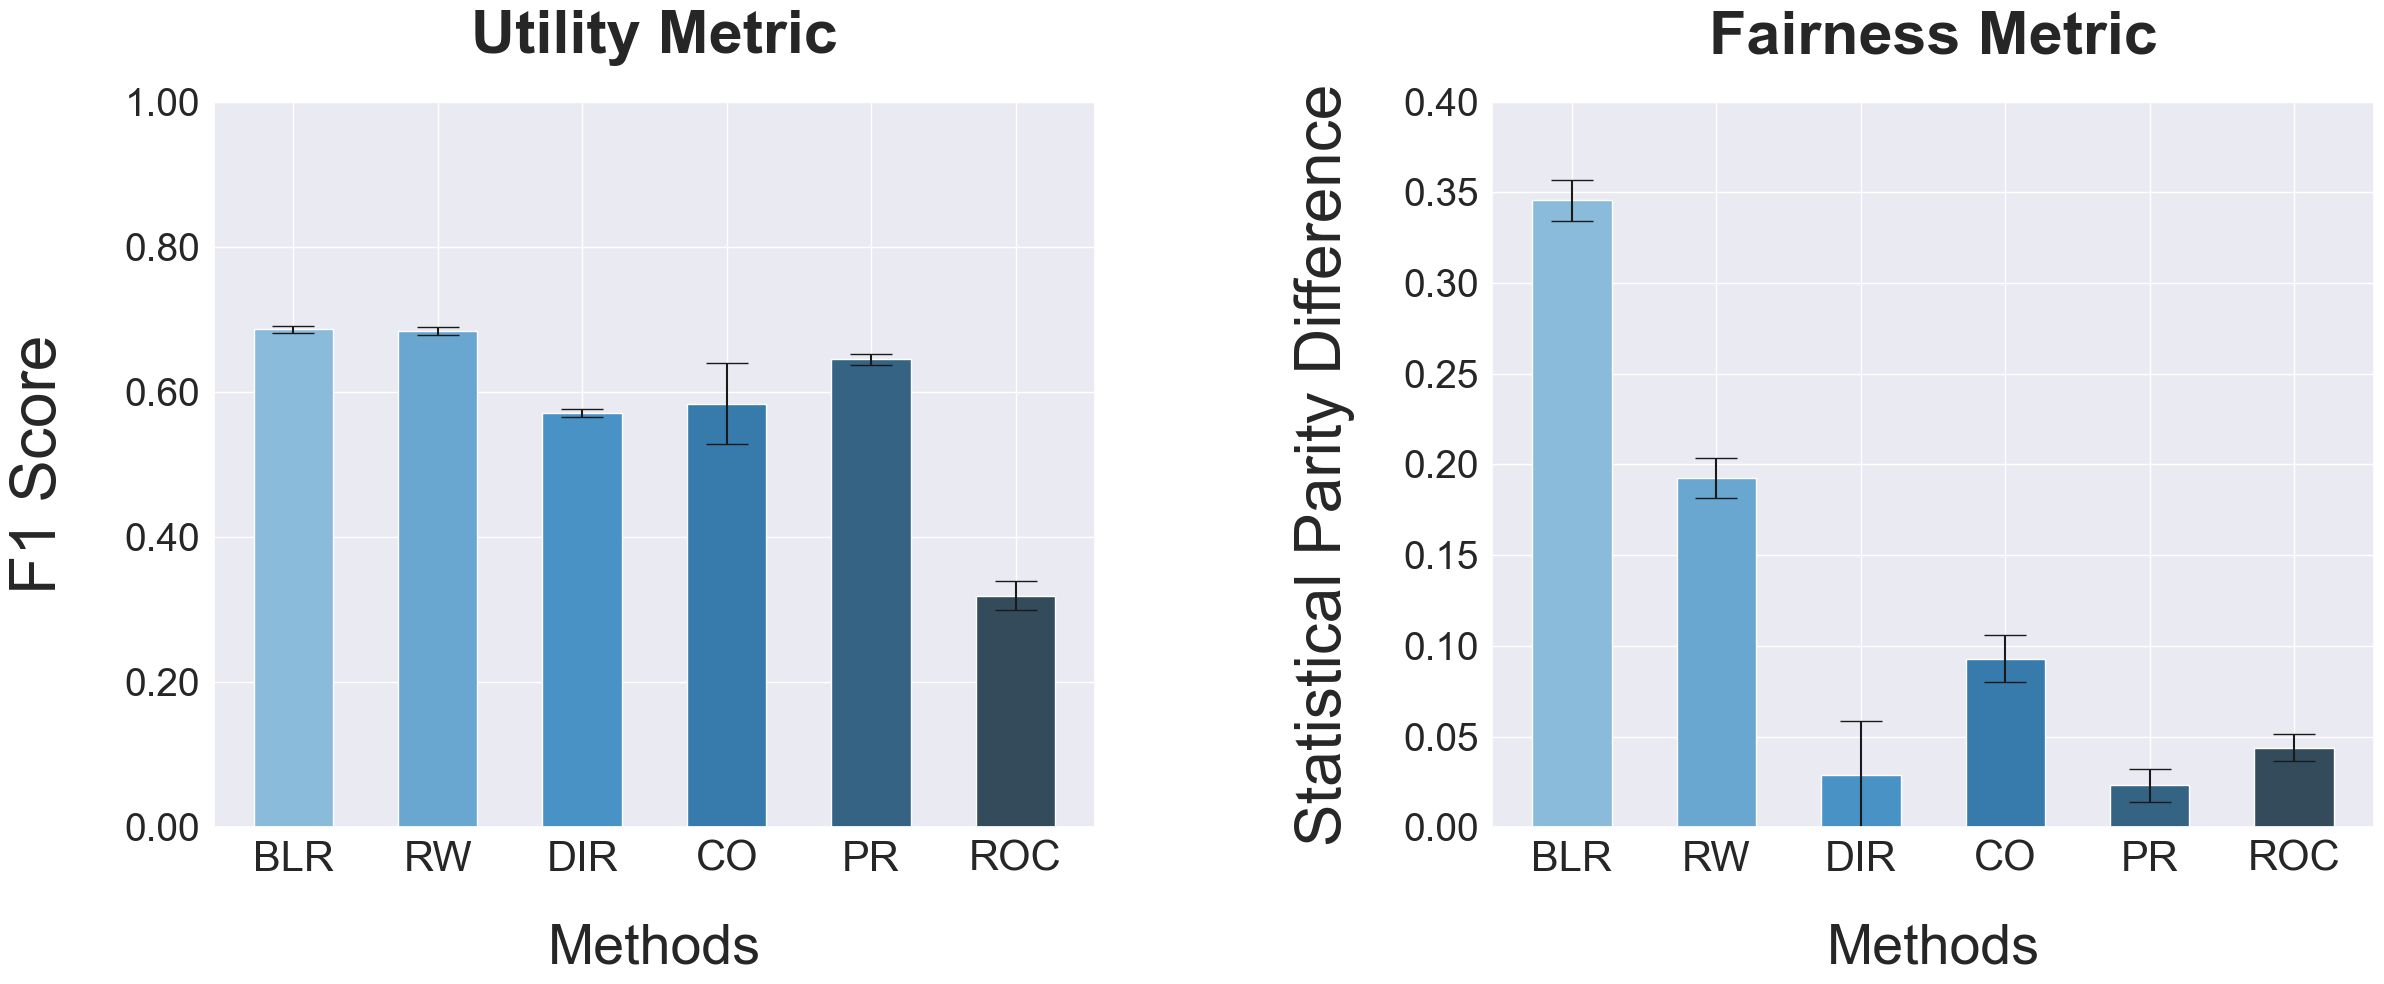

C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels, fontsize=28)
C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ytick_labels, fontsize=28)


<Figure size 640x480 with 0 Axes>

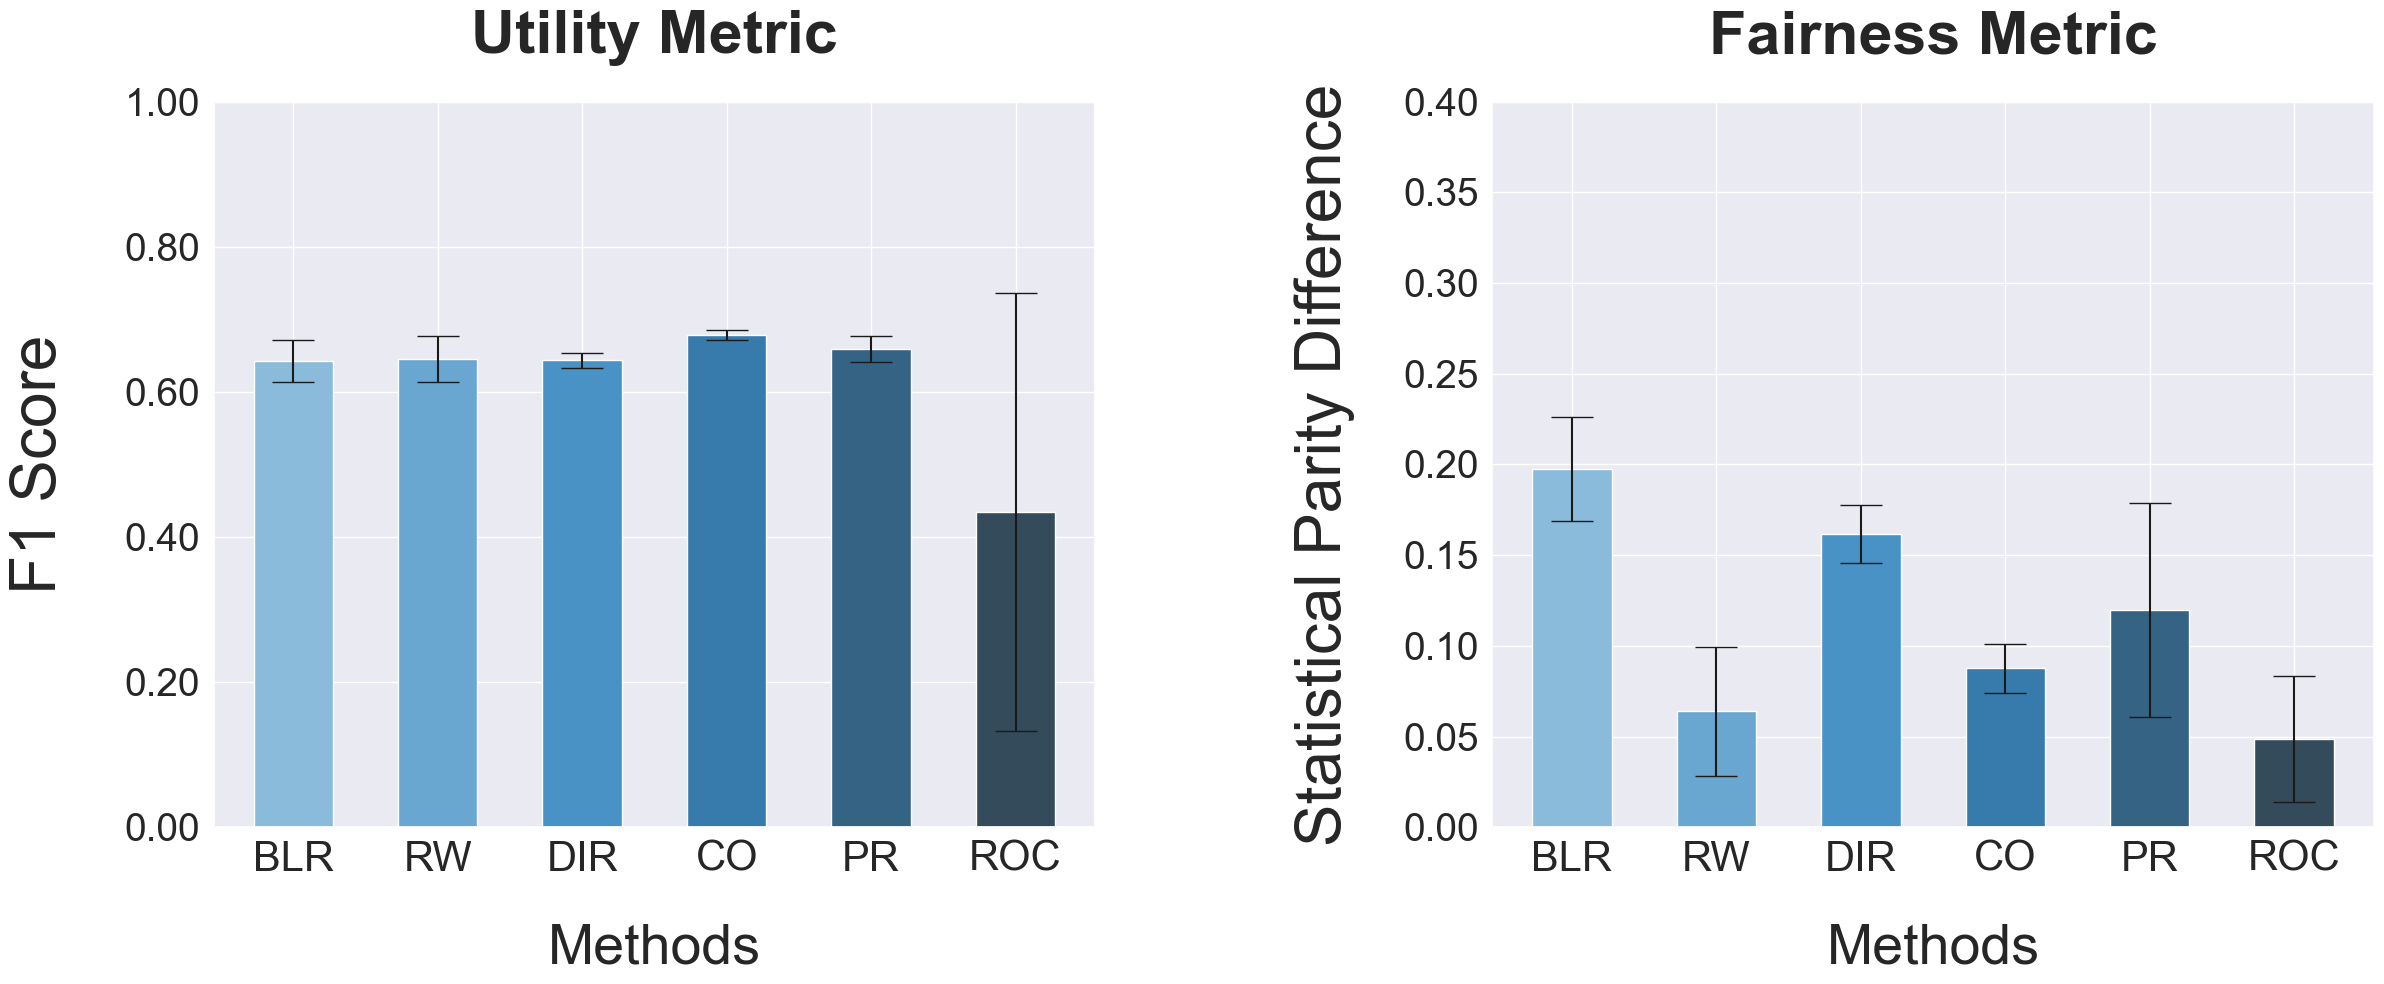

C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ytick_labels, fontsize=28)
C:\Users\murilo.pinheiro\AppData\Local\Temp\ipykernel_1536\3273075306.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ytick_labels, fontsize=28)


<Figure size 640x480 with 0 Axes>

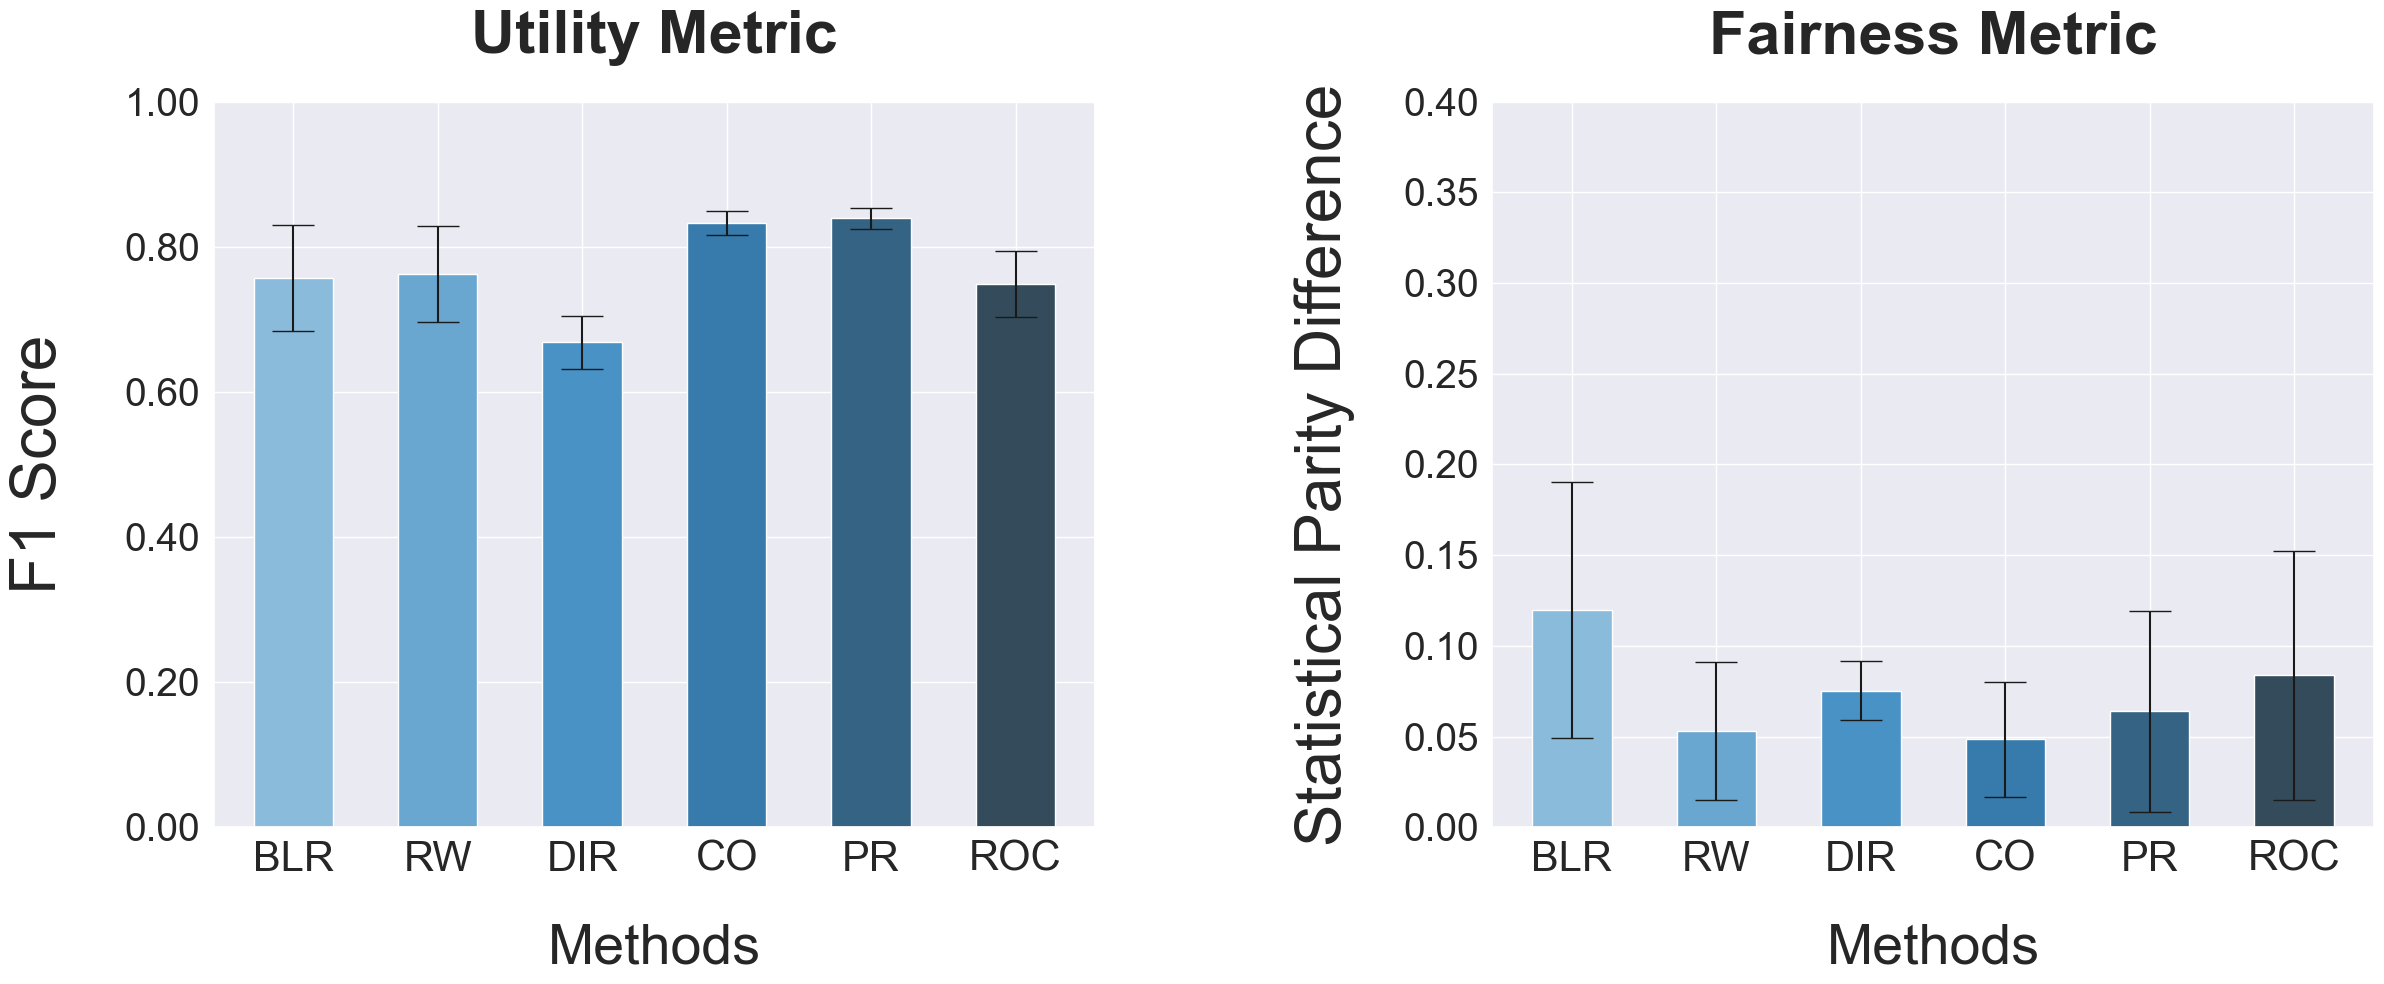

In [104]:
#plotF1("Adult")
#plotSPD("Adult")
plot_combined("Adult")

#plotF1("Compas")
#plotSPD("Compas")
plot_combined("Compas")

#plotF1("German")
#plotSPD("German")
plot_combined("German")
